In [21]:
library( readxl )
library( caret )
library( lubridate )
library( ggmap )

In [3]:
df <- read_excel( '../data/7_segmentation/scaling-exercise-data.xlsx' )

In [4]:
df

Store ID,% Income > 50K,# of Households
1,0.35,50000
2,0.40,100000
3,0.70,25000
4,0.10,400000
5,0.90,250000


In [6]:
scale( df$"% Income > 50K")

-0.4472136
-0.2874945
0.6708204
-1.2458093
1.3096970


In [8]:
scale( df$"# of Households")

-0.7291490
-0.4121277
-0.8876597
1.4900002
0.5389362


In [9]:
df <- read.csv( '../data//7_segmentation/climate-data-sample.csv' )

In [12]:
head( df )

StoreID,City,State,Date.Last.Winter.Freeze,Date.First.Winter.Freeze,Growing.Season.Length,Jan.Avg.Tot.Prec,Feb.Avg.Tot.Prec,Mar.Avg.Tot.Prec,Apr.Avg.Tot.Prec,⋯,Jun.Avg.Temp,Jul.Avg.Temp,Aug.Avg.Temp,Sep.Avg.Temp,Oct.Avg.Temp,Nov.Avg.Temp,Dec.Avg.Temp,Elevation,Longitude,Latitude
2,Hayward,WI,2009-06-25,2009-08-31,126,0.532,0.808,1.636,2.368,⋯,63.06,68.08,65.75,56.12,44.82,29.59,15.40,1271.08,-91.27598,46.03058
3,Baxter,MN,2009-05-29,2009-09-06,147,0.352,0.464,1.690,1.712,⋯,64.00,68.61,66.23,55.88,43.90,27.58,12.46,1221.80,-94.28250,46.34109
6,Grand Rapids,MN,2009-06-02,2009-09-11,133,0.370,0.098,1.250,1.148,⋯,62.86,67.32,65.19,55.11,43.54,26.76,11.44,1329.16,-93.53763,47.19999
9,Bottineau,ND,2009-05-31,2009-09-16,141,0.256,0.280,0.702,0.896,⋯,62.58,66.84,65.51,54.34,41.55,23.39,8.71,1696.13,-100.39696,48.85540
10,Bemidji,MN,2009-05-31,2009-09-20,147,0.176,0.154,1.318,1.278,⋯,62.89,67.45,65.30,55.14,43.60,25.94,11.15,1394.71,-94.81920,47.51467
11,Wadena,MN,2009-05-24,2009-09-21,151,0.246,0.456,1.790,1.548,⋯,64.37,68.74,66.90,56.83,44.70,27.40,12.65,1384.48,-95.14531,46.46750


In [14]:
df <- transform( df
               , Date.Last.Winter.Freeze = ymd( Date.Last.Winter.Freeze )
               , Date.First.Winter.Freeze = ymd( Date.First.Winter.Freeze)
               )

In [16]:
df$Date.Last.Winter.Freeze <- df$Date.Last.Winter.Freeze - median( df$Date.Last.Winter.Freeze )

In [17]:
df$Date.First.Winter.Freeze <- df$Date.First.Winter.Freeze - median( df$Date.First.Winter.Freeze )

In [18]:
head( df )

StoreID,City,State,Date.Last.Winter.Freeze,Date.First.Winter.Freeze,Growing.Season.Length,Jan.Avg.Tot.Prec,Feb.Avg.Tot.Prec,Mar.Avg.Tot.Prec,Apr.Avg.Tot.Prec,⋯,Jun.Avg.Temp,Jul.Avg.Temp,Aug.Avg.Temp,Sep.Avg.Temp,Oct.Avg.Temp,Nov.Avg.Temp,Dec.Avg.Temp,Elevation,Longitude,Latitude
2,Hayward,WI,56 days,-42 days,126,0.532,0.808,1.636,2.368,⋯,63.06,68.08,65.75,56.12,44.82,29.59,15.40,1271.08,-91.27598,46.03058
3,Baxter,MN,29 days,-36 days,147,0.352,0.464,1.690,1.712,⋯,64.00,68.61,66.23,55.88,43.90,27.58,12.46,1221.80,-94.28250,46.34109
6,Grand Rapids,MN,33 days,-31 days,133,0.370,0.098,1.250,1.148,⋯,62.86,67.32,65.19,55.11,43.54,26.76,11.44,1329.16,-93.53763,47.19999
9,Bottineau,ND,31 days,-26 days,141,0.256,0.280,0.702,0.896,⋯,62.58,66.84,65.51,54.34,41.55,23.39,8.71,1696.13,-100.39696,48.85540
10,Bemidji,MN,31 days,-22 days,147,0.176,0.154,1.318,1.278,⋯,62.89,67.45,65.30,55.14,43.60,25.94,11.15,1394.71,-94.81920,47.51467
11,Wadena,MN,24 days,-21 days,151,0.246,0.456,1.790,1.548,⋯,64.37,68.74,66.90,56.83,44.70,27.40,12.65,1384.48,-95.14531,46.46750


Using zoom = 4...
Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”

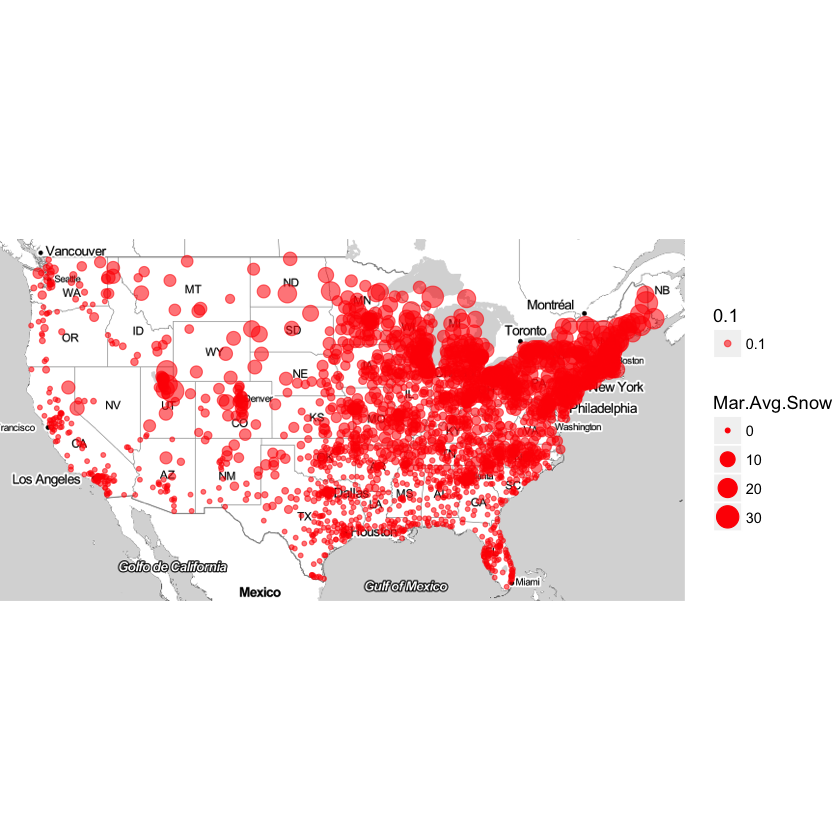

In [32]:
qmplot( Longitude
       , Latitude
       , size = Mar.Avg.Snow
       , alpha = 0.1
       , data = df
       , maptype = "toner-lite"
       , color = I("red") )